In [1]:
import sys
from matplotlib import pyplot as plt

sys.path.append('../')
from src.window import multiple_reflection as shg

# 概要

複数の層で構成されたガラスの日射特性値を計算する。  

ガラスの日射特性値とは、
- 正面側からの入射光に対する日射透過率
- 背面側からの入射光に対する日射透過率
- 正面側からの入射光に対する日射反射率
- 背面側からの入射光に対する日射反射率
- 各層における日射吸収率

である。計算方法はJIS A2103に基づく。

# 理論

## 任意の層から任意の層までの多重反射計算  

隣り合う層$i$から層$j$までの値の計算方法を以下に示す。  

（参考：JIS A 2103：2014 5.4.2 日射透過率及び各面材の日射吸収率）

$$ \tau_{f,i,j} = \frac {\tau_{f,i,j-1} \cdot \tau_{f,j}}{1-\rho_{b,i,j-1} \cdot \rho_{f,j}} $$

$$ \tau_{b,i,j} = \frac {\tau_{b,j} \cdot \tau_{b,i,j-1}}{1-\rho_{b,i,j-1} \cdot \rho_{f,j}} $$

$$ \rho_{f,i,j} = \rho_{f,i,j-1} + \frac {\tau_{f,i,j-1} \cdot \rho_{f,j} \cdot \tau_{b,i,j-1}}{1-\rho_{b,i,j-1} \cdot \rho_{f,j}} $$

$$ \rho_{b,i,j} = \rho_{b,j} + \frac {\tau_{b,j} \cdot \rho_{b,i,j-1} \cdot \tau_{f,j}}{1-\rho_{b,i,j-1} \cdot \rho_{f,j}} $$

ここで、

$ \tau_{f,i,j} $　：　層$i$－$j$間の正面側からの入射光に対する日射透過率  
$ \tau_{b,i,j} $　：　層$i$－$j$間の背面側からの入射光に対する日射透過率  
$ \rho_{f,i,j} $　：　層$i$－$j$間の正面側からの入射光に対する日射反射率  
$ \rho_{b,i,j} $　：　層$i$－$j$間の背面側からの入射光に対する日射反射率  

である。  

任意の層$i$－$j$間の値を求める場合は、層$i+1$, $i+2$,..., $j-2$, $j-1$, $j$というように、式(5.1.2-a)～式(5.1.2-d)を逐次代入して求める。  

ここで、$ i=j $ のときは、

$$ \tau_{f,i,j} = \tau_{f,j} $$

$$ \tau_{b,i,j} = \tau_{b,j} $$

$$ \rho_{f,i,j} = \rho_{f,j} $$

$$ \rho_{b,i,j} = \rho_{b,j} $$

である。

## 各層の日射吸収率

各層の値の計算方法を以下に示す。（JISでは添え字は1始まりであるが、本仕様書では0始まりとしている。） 

（参考：JIS A 2103：2014 5.4.2 日射透過率及び各面材の日射吸収率）  

$ j = 0 $ かつ $ n = 0 $ の場合

$$ \alpha_j = \alpha_{f,j} $$

$ j = 0 $ かつ $ n \neq 0 $ の場合

$$ \alpha_j = \alpha_{f,j} + \frac {\tau_{f,0,j} \cdot \rho_{f,j+1,n}}{1-\rho_{b,0,j} \cdot \rho_{f,j+1,n}} \cdot \alpha_{b,j} $$

$ j = 1 $ ～ $ n - 2 $ の場合 

$$ \alpha_j = \frac {\tau_{f,0,j-1}}{1-\rho_{b,0,j-1} \cdot \rho_{f,j,n}} \cdot \alpha_{f,j} + \frac {\tau_{f,0,j} \cdot \rho_{f,j+1,n}}{1-\rho_{b,0,j} \cdot \rho_{f,j+1,n}} \cdot \alpha_{b,j} $$

$ j = n - 1 $ の場合

$$ \alpha_j = \frac {\tau_{f,0,j-1}}{1-\rho_{b,0,j-1} \cdot \rho_{f,j,n}} \cdot \alpha_{f,j} $$

ここで、

$j$ ：層の番号  
$n$ ：層の数  

である。  

また、

$$ \alpha_{f,j} = 1 - \tau_{f,j} - \rho_{f,j} $$

$$ \alpha_{b,j} = 1 - \tau_{b,j} - \rho_{b,j} $$

である。

## グレージング複合体全体の透過率  

グレージング複合体全体の透過率は、定義から、

$$ \tau_{glz} = \tau_{f,0,n-1} $$

となる。  

# 使い方

まず、ガラス1枚について、  

- 正面側からの入射光に対する日射透過率
- 背面側からの入射光に対する日射透過率
- 正面側からの入射光に対する日射反射率
- 背面側からの入射光に対する日射反射率

を設定する。　　
ガラス1枚に対応するクラスが、SolarSpecSingleLayer クラスであり、下記の引数に対応する数字を設定する。 

- tau_f : 正面側からの入射光に対する日射透過率
- tau_b : 背面側からの入射光に対する日射透過率
- rho_f : 正面側からの入射光に対する日射反射率
- rho_b : 背面側からの入射光に対する日射反射率

In [2]:
# ガラス1枚目
g1 = shg.SolarSpecSingleLayer(tau_f=0.859, tau_b=0.859, rho_f=0.077, rho_b=0.077)
# ガラス2枚目
g2 = shg.SolarSpecSingleLayer(tau_f=0.859, tau_b=0.859, rho_f=0.077, rho_b=0.077)
# ガラス3枚目
g3 = shg.SolarSpecSingleLayer(tau_f=0.859, tau_b=0.859, rho_f=0.077, rho_b=0.077)

各係数を計算する関数に、ガラスのリストとして渡すため、正面側から順番にガラスをリストにしておく。単板ガラスの場合もリストにすること。

In [3]:
ss = [g1, g2, g3]

窓全体の性能を計算する場合は、 get_total_solar_spec 関数を使用する。引数にはガラスのリストを渡す。  
戻り値は、ガラス全体の日射特性値を表すクラスであり、下記のプロパティを持つ。

- tau_f : 正面側からの入射光に対する日射透過率
- tau_b : 背面側からの入射光に対する日射透過率
- rho_f : 正面側からの入射光に対する日射反射率
- rho_b : 背面側からの入射光に対する日射反射率

In [4]:
sm = shg.get_total_solar_spec(ss=ss)

# 窓の反射率（正面側からの入射光）
rho = sm.rho_f

# 窓の透過率（正面側からの透過率）
tau = sm.tau_f

print(rho, tau)

0.1770242008152192 0.6442755896857679


窓の各層における日射吸収率は、　get_abs_multi_layer　関数を使用する。引数にはガラスのリストを渡す。  
戻り値は、日射吸収率のリスト。

In [5]:
alpha = shg.get_abs_multi_layer(ss=ss)

print(alpha)

[0.0714523269524727, 0.05924597598089509, 0.04800190656564512]


念の為、グレージング複合体の透過率・反射率・吸収率の合計が1.0になっているかを確認する。

In [6]:
total = rho + tau + sum(alpha)

total

1.0

各要素を円グラフに表す。

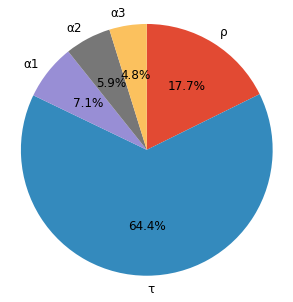

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.style.use('ggplot')
ax = fig.add_subplot(1, 1, 1)
ax.pie(
    [rho, tau, alpha[0], alpha[1], alpha[2]],
    labels=['ρ', 'τ', 'α1', 'α2', 'α3'],
    autopct='%1.1f%%',
    pctdistance=0.6,
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)

plt.axis('equal')

plt.show()
